# Customer Segmentation

## Background

This dataset contains all purchases made for an online retail company based in the UK during an eight month period. We could use cluster analysis combined with RFM analysis to do a customer segmentation.

## Prepare and Explore the Data

For this experiment, we will use [this](https://www.kaggle.com/vijayuv/onlineretail) data from Kaggle platform.

In [ ]:
# Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)

In [ ]:
# Load data
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_backup = df.copy()
df_backup.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
len(df)

541909

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


*Beberapa feature memiliki missing values*

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


negative values in qty and unit price

In [ ]:
df.loc[df['CustomerID'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [ ]:
#df.to_csv("Online_Retail.csv", index= False)

In [ ]:
print("Total data:", len(df))

Total data: 541909


In [ ]:
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
weird_data = df[(df.Quantity <= 0) | ( df.UnitPrice <= 0)]

In [ ]:
len(weird_data)

11805

Since we want to segment our customers, we have to make sure that `CustomerID` is not null.

In [ ]:
# Check missing value
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
(135080 / 541909)*100

24.926694334288598

We could see that there is missing value in `CustomerID` columns (25%). We could remove those missing values.

In [ ]:
# Remove missing value
df = df[df["CustomerID"].notna()]
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Then we could do some descriptive statistic.

In [ ]:
# Simple descriptive statistic
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Wait, hold on. How come the quantity is a negative number and the unit price is zero? Let's check it.

In [ ]:
# Check anomaly data
quantity_zero = len(df[df["Quantity"] <= 0])
perc_quantity_zero = (len(df[df["Quantity"] <= 0]) / len(df)) * 100
unitprice_zero = len(df[df["UnitPrice"] == 0])
perc_unitprice_zero = (len(df[df["UnitPrice"] == 0]) / len(df)) * 100

print("The data consist of", str(quantity_zero), "rows of data with item quantity less/equal than zero.")
print("About {:.2f}% of total data".format(perc_quantity_zero))
print("")
print("The data consist of", str(unitprice_zero), "rows of data with unit price equal to zero.")
print("About {:.2f}% of total data".format(perc_unitprice_zero))

The data consist of 8905 rows of data with item quantity less/equal than zero.
About 2.19% of total data

The data consist of 40 rows of data with unit price equal to zero.
About 0.01% of total data


Small percentage, then just remove those anomaly data

In [ ]:
# Remove anomaly
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


Now we're good to go. Lets do some data exploration!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


The data contains 406829 rows and 8 columns, each row represents each item in a purchasement. The columns are:
* `InvoiceNo` - Invoice number, to identify each invoice
* `StockCode` - Stock code, to identify each item in the inventory
* `Description` - Item's description
* `Quantity` - Number of purchased item in each invoice
* `InvoiceDate` - Date of purchasement
* `UnitPrice` - Item's price per unit
* `CustomerID` - Customer's identification number
* `Country` - Customer's country of origin

In [ ]:
# Check unique value
df[['InvoiceNo', 'StockCode', 'CustomerID', 'Country']].nunique()

,0
InvoiceNo,18532
StockCode,3665
CustomerID,4338
Country,37


There are 18532 purchasements, 3665 unique item purchased, from 4338 customers that came from 37 countries.

As we seen above, there are 37 countries of customer's origin. Since the retail company is based in the UK, we could simplified the country as UK or Non UK

In [ ]:
# df['Country_isUK'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Non UK')

In [ ]:
%%timeit
df['Country'].apply(lambda x: "UK" if x == "United Kingdom" else "Non UK")

60.5 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
np.where(df['Country'].values == 'United Kingdom', 'UK', 'Non UK')

17.2 ms ± 4.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
(61.3 - 17.8)/61.3 , (1 - ((61.3 - 17.8)/61.3)) * 60

(0.7096247960848288, 17.422512234910275)

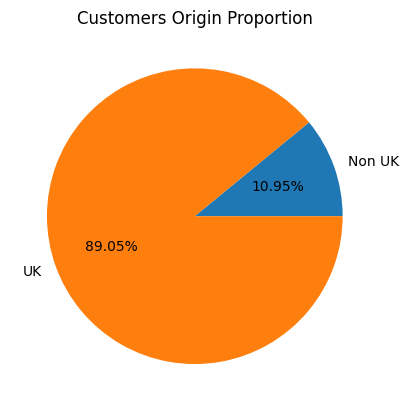

In [ ]:
# Simplify country origin
df['Country_isUK'] = np.where(df['Country']=='United Kingdom', 'UK', 'Non UK')
customers_origin = df.groupby(['Country_isUK']).size()

plt.title('Customers Origin Proportion')
plt.pie(
    customers_origin,
    labels=customers_origin.index,
    autopct=lambda p: f'{p:.2f}%'
)
plt.show();

Based on the piechart, we could see that mostly our customers are from the UK.

Next, we could analyze the trend of purchasement. First, lets create `TotalAmount` column (`Quantity` * `UnitPrice`). Then, we could transform the `InvoiceDate` data type from string to date.

In [ ]:
# Create new features and cast date column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_isUK,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,UK,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,UK,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34


Then plot the trendline.

In [ ]:
import matplotlib.dates as mdates

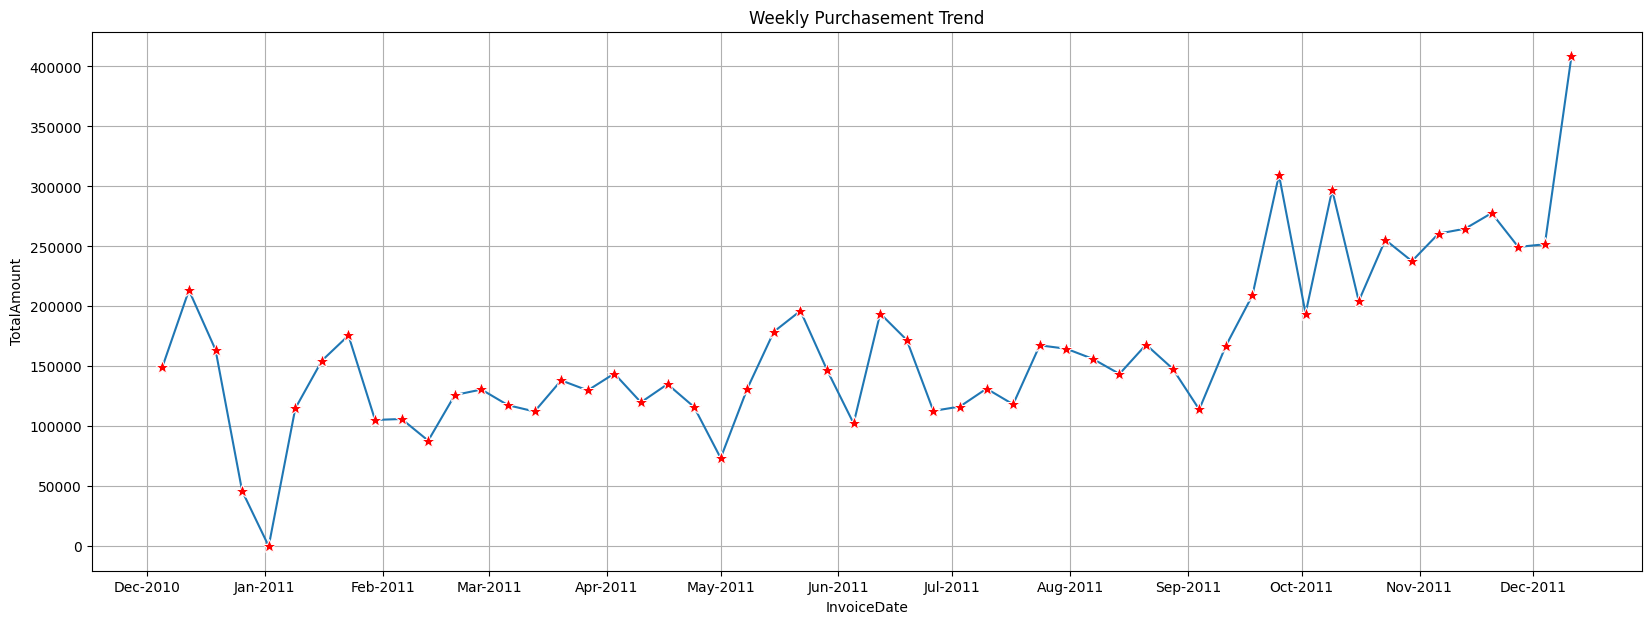

In [ ]:
# Plot weekly trend
weekly_purchasements = df.copy()
weekly_purchasements = weekly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1W"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Weekly Purchasement Trend')
ax = sns.lineplot(
    x=weekly_purchasements.index,
    y=weekly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

In [ ]:
weekly_purchasements

,TotalAmount
InvoiceDate,
2010-12-05,149386.330
2010-12-12,213447.720
2010-12-19,163770.730
2010-12-26,46109.110
2011-01-02,0.000
2011-01-09,114865.270
2011-01-16,154714.940
2011-01-23,175757.980
2011-01-30,105288.770


<ipython-input-29-e982ca50c446>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  by=pd.Grouper(key="InvoiceDate", freq="1M"))["TotalAmount"].sum()


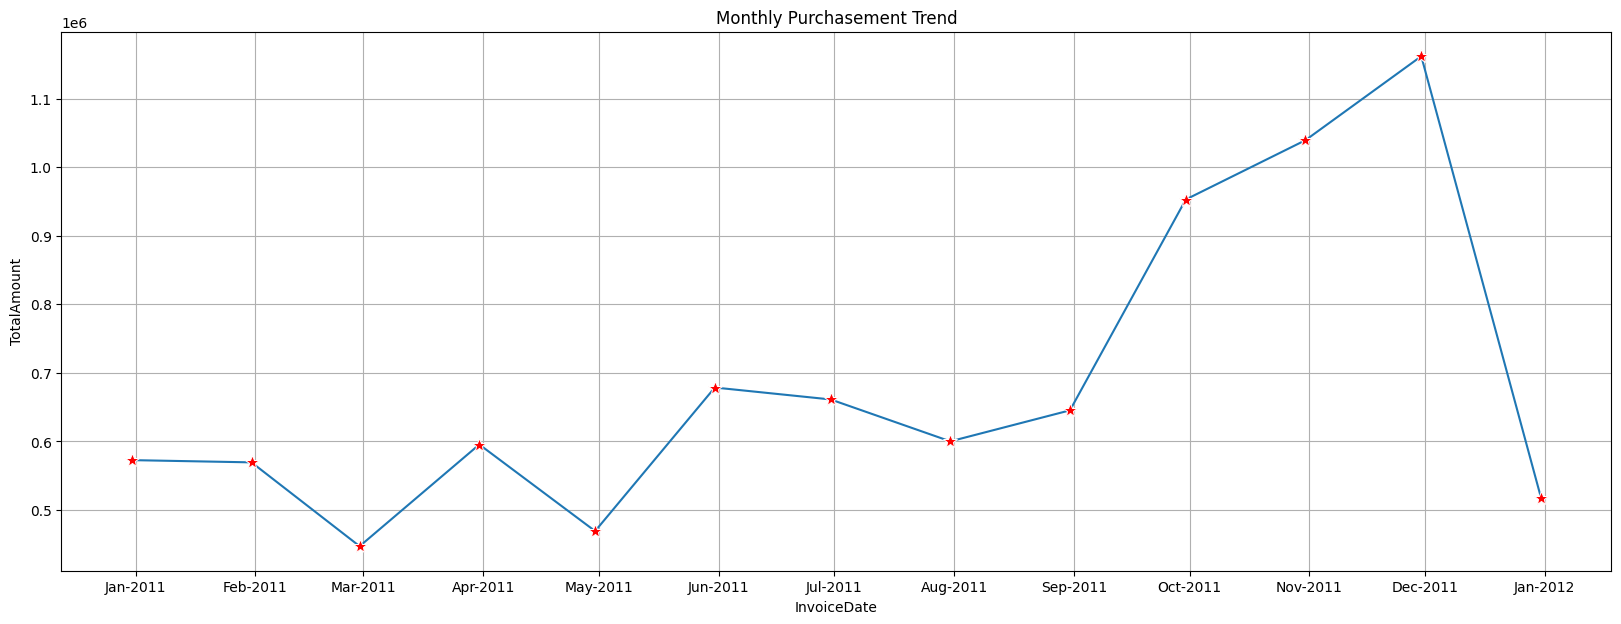

In [ ]:
# Plot monthly trend
monthly_purchasements = df.copy()
monthly_purchasements = monthly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1M"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Monthly Purchasement Trend')
ax = sns.lineplot(
    x=monthly_purchasements.index,
    y=monthly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

Based on the picture above, it can be seen that there was an increase in total purchases at the end of the year.

## RFM

In this project, we would segment the customers using customer's demography and purchasement behavior. To explain the customer's demography, we could use `Country` column while to explain the customer's purchasement behavior we have to transform our data first to get those information. We could use RFM analysis to get those information.

### Recency

To measure customer's recency, we could substract the latest transaction date in the data with each customer's latest transaction.

In [ ]:
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency.head(10)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
12352.0,2011-11-03 14:37:00
12353.0,2011-05-19 17:47:00
12354.0,2011-04-21 13:11:00
12355.0,2011-05-09 13:49:00


In [ ]:
max(recency)

Timestamp('2011-12-09 12:50:00')

In [ ]:
recency = max(recency) - recency
recency.head(10)

,InvoiceDate
CustomerID,
12346.0,325 days 02:49:00
12347.0,1 days 20:58:00
12348.0,74 days 23:37:00
12349.0,18 days 02:59:00
12350.0,309 days 20:49:00
12352.0,35 days 22:13:00
12353.0,203 days 19:03:00
12354.0,231 days 23:39:00
12355.0,213 days 23:01:00


In [ ]:
# Get customer's recency
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency = max(recency) - recency
recency = recency.dt.days
recency = recency.rename('Recency')

recency.head()

,Recency
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309


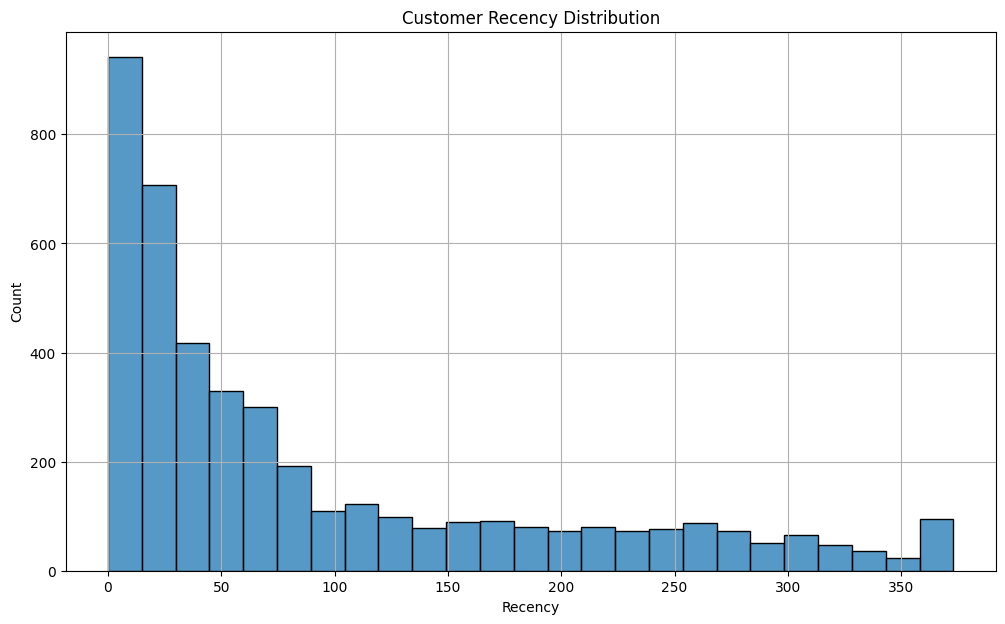

In [ ]:
# Recency histogram plot
plt.figure(figsize=(12, 7))
sns.histplot(recency)
plt.title('Customer Recency Distribution')
plt.grid()
plt.show()

### Frequency

To measure customer's frequency, we could count customer's invoice.

In [ ]:
# Count frequency, group invoice no based on each cust id
frequency = df.groupby(['CustomerID'])['InvoiceNo'].count()
frequency = frequency.rename('Frequency')
frequency.head()

,Frequency
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


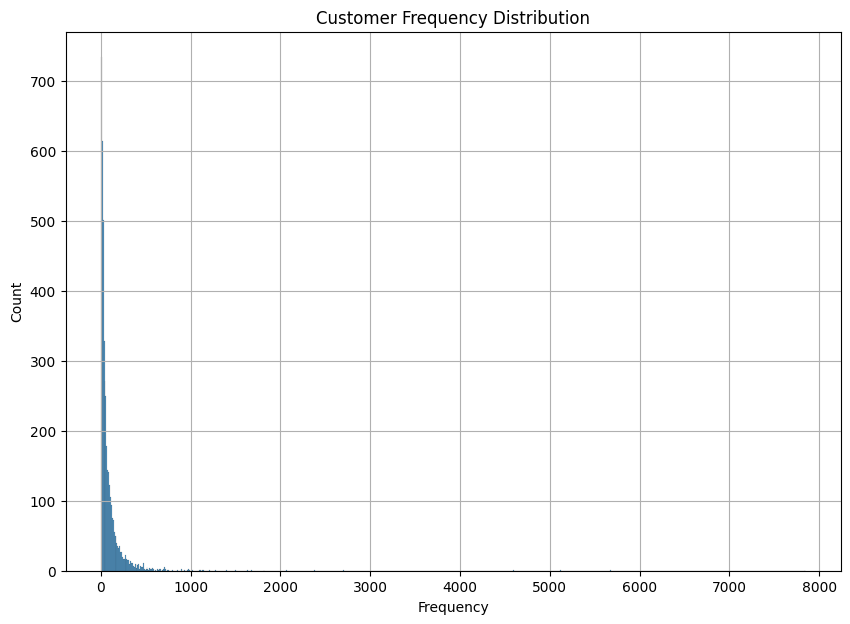

In [ ]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency)
plt.grid()
plt.show();

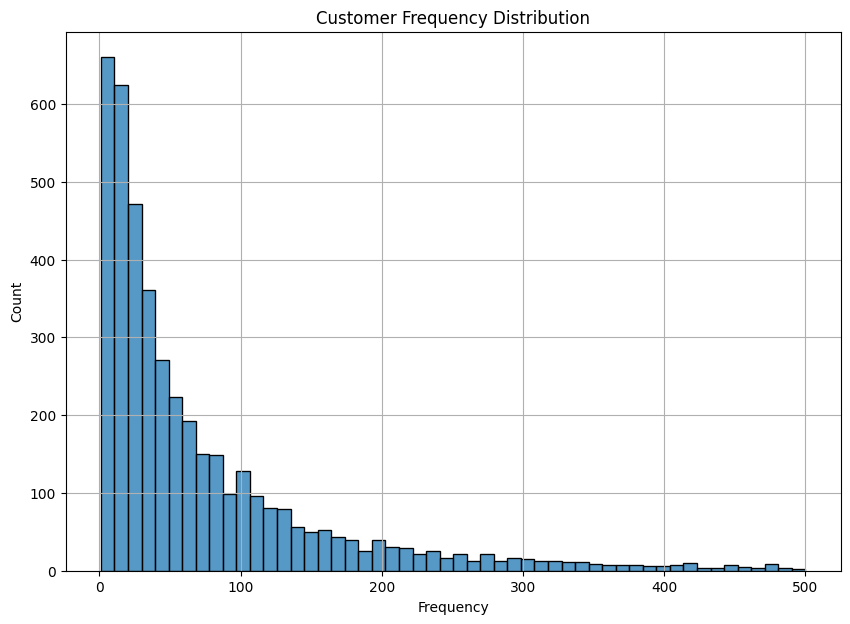

In [ ]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency[frequency <= 500])
plt.grid()
plt.show();

Text(0.5, 1.0, 'Frequency <= 500')

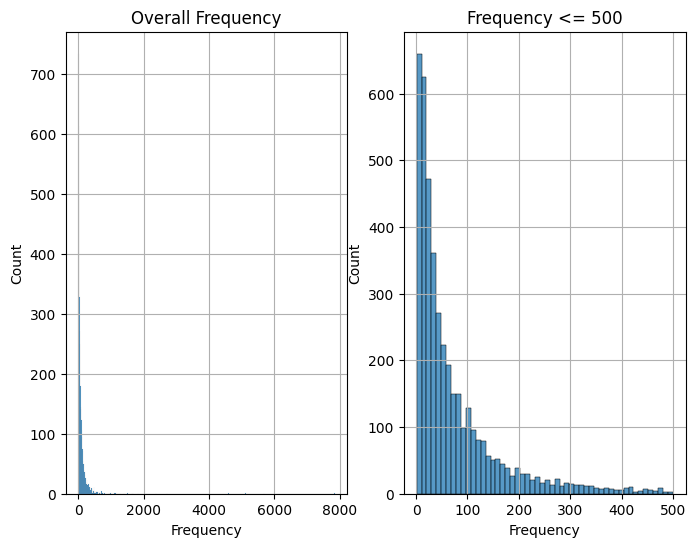

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot(frequency, ax=axs[0])
sns.histplot(frequency[frequency <= 500], ax=axs[1])

axs[0].grid()
axs[0].set_title('Overall Frequency')

axs[1].grid()
axs[1].set_title('Frequency <= 500')

In [ ]:
frequency.head()

,Frequency
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


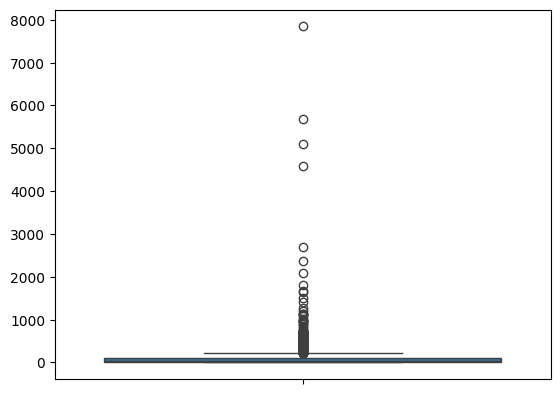

In [ ]:
sns.boxplot(frequency.values);

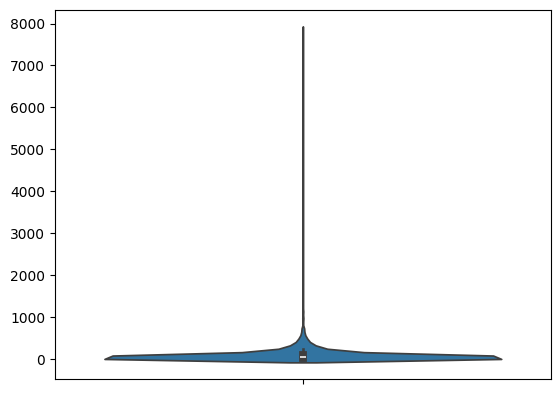

In [ ]:
sns.violinplot(frequency.values);

### Monetary

To measure customer's monetary, we could sum the customer's total purchasements.

In [ ]:
# Sum the money spent
monetary = df.groupby(['CustomerID'])['TotalAmount'].sum()
monetary = monetary.rename('Monetary')
monetary.head()

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


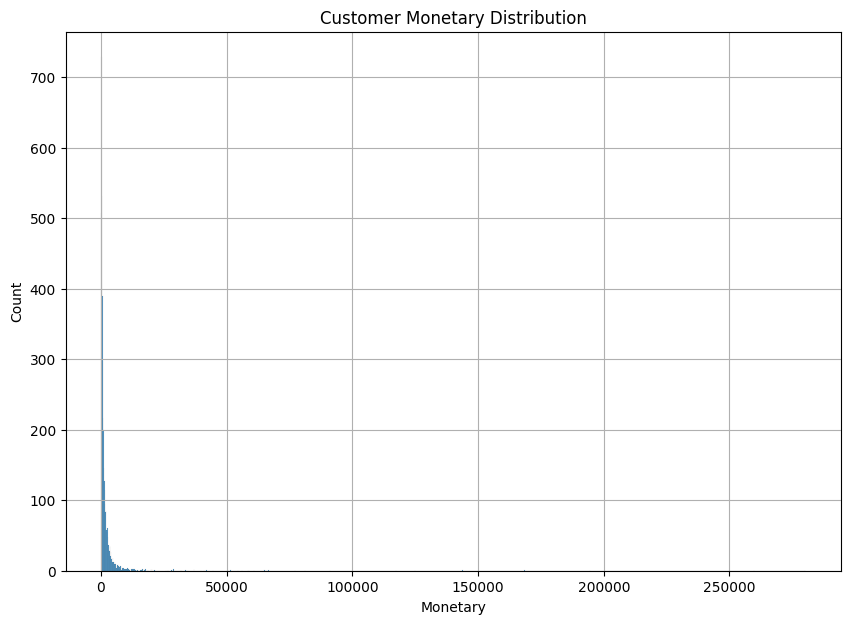

In [ ]:
# Monetary histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary)
plt.grid()
plt.show()

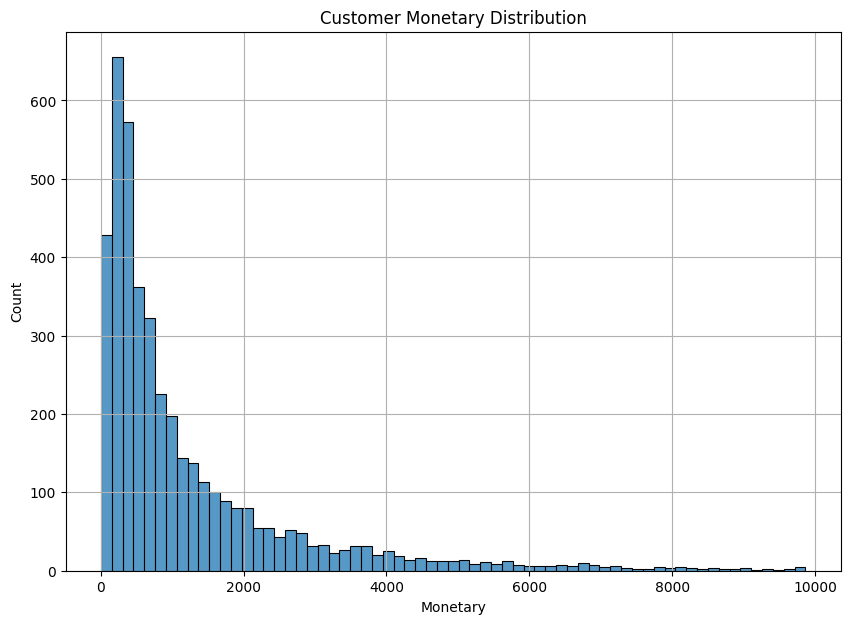

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary[monetary < 10000])
plt.grid()
plt.show()

### Merge the Data

The data could be separated into two dataframes. The first dataframe (log transformed data) supposed to be used when modeling and the second one (without log transformation) could be used when visualize the result.

In [ ]:
(
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

,CustomerID,Country_isUK
0,12346.0,UK
1,12347.0,Non UK
2,12348.0,Non UK
3,12349.0,Non UK
4,12350.0,Non UK
5,12352.0,Non UK
6,12353.0,Non UK
7,12354.0,Non UK
8,12355.0,Non UK
9,12356.0,Non UK


In [ ]:
df.groupby(['CustomerID', 'Country_isUK']).size()

,,0
CustomerID,Country_isUK,
12346.0,UK,1
12347.0,Non UK,182
12348.0,Non UK,31
12349.0,Non UK,73
12350.0,Non UK,17
12352.0,Non UK,85
12353.0,Non UK,4
12354.0,Non UK,58
12355.0,Non UK,13


In [ ]:
# Get customer's country of origin
country = (
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

# Merge the data
df_new = (
    country
    .merge(recency, on='CustomerID')
    .merge(frequency, on='CustomerID')
    .merge(monetary, on='CustomerID')
)

# Set CustomerID as index
df_new = df_new.set_index('CustomerID')
df_new.head(20)

,Country_isUK,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,UK,325,1,77183.60
12347.0,Non UK,1,182,4310.00
12348.0,Non UK,74,31,1797.24
12349.0,Non UK,18,73,1757.55
12350.0,Non UK,309,17,334.40
12352.0,Non UK,35,85,2506.04
12353.0,Non UK,203,4,89.00
12354.0,Non UK,231,58,1079.40
12355.0,Non UK,213,13,459.40


### One Hot Encoding

Since our model could just accept the numeric value, we have to recode the non numeric column.

In [ ]:
# Recode the non numeric variable
# One-hot encoding (pd.get_dummies)

df_new = pd.get_dummies(
    df_new,
    columns=['Country_isUK'],
    drop_first=True
)

df_new = df_new.rename(
    columns={'Country_isUK_UK': 'Country_UK'}
)

df_new.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,325,1,77183.60,True
12347.0,1,182,4310.00,False
12348.0,74,31,1797.24,False
12349.0,18,73,1757.55,False
12350.0,309,17,334.40,False


### Scaling

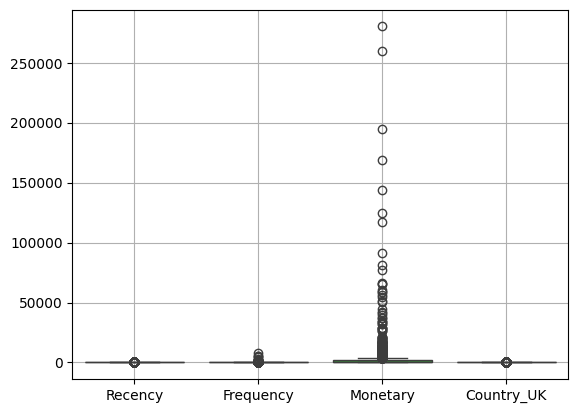

In [ ]:
sns.boxplot(data=df_new)
plt.grid()
plt.show()

As we could see, there are variation of range in each column. We have to standardize it first.

In [ ]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

df_scaled = pd.DataFrame(
    df_scaled,
    columns=df_new.columns,
    index=df_new.index
)

df_scaled.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,2.334574,-0.396578,8.358668,0.326547
12347.0,-0.905340,0.394649,0.250966,-3.062350
12348.0,-0.175360,-0.265435,-0.028596,-3.062350
12349.0,-0.735345,-0.081836,-0.033012,-3.062350
12350.0,2.174578,-0.326635,-0.191347,-3.062350


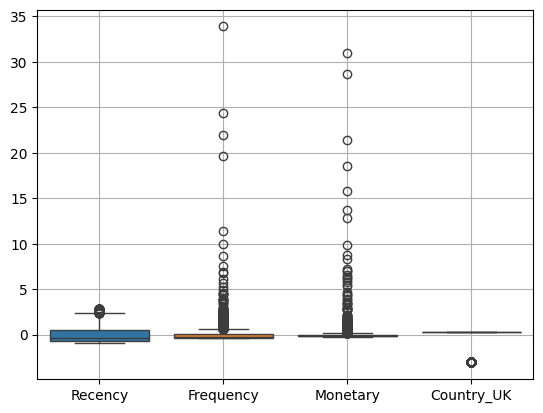

In [ ]:
# Plot scaled data
sns.boxplot(data=df_scaled)
plt.grid()
plt.show()

## Modeling

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Check how many k we should do

In [ ]:
# Modeling
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    silhouette.append(silhouette_score(X=df_scaled, labels=kmeans.labels_))

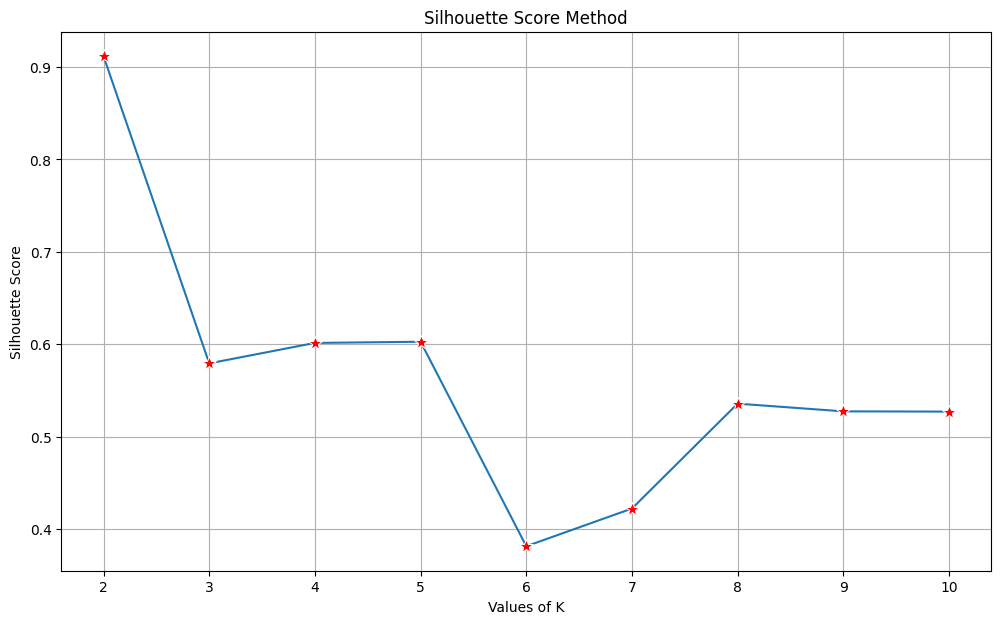

In [ ]:
# Plot the score
plt.figure(figsize=(12, 7))
sns.lineplot(
    x=possible_k,
    y=silhouette,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show();

Lets try 3

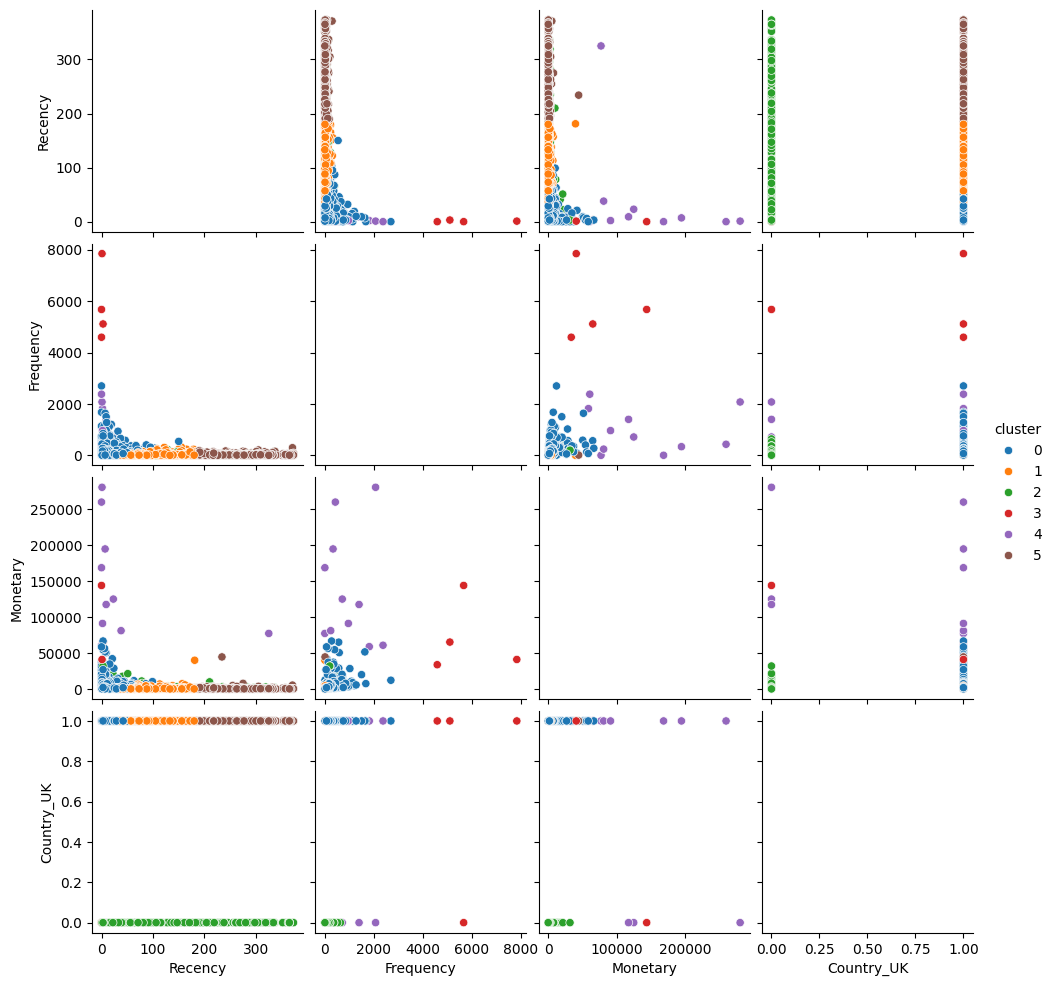

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_scaled)

df_result_kmeans = df_new.copy()
df_result_kmeans['cluster'] = kmeans.labels_

sns.pairplot(
    data=df_result_kmeans,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)

plt.show();

In [ ]:
# Quantile function
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# Simple descriptive statistic
(
    df_result_kmeans
    .drop("Country_UK", axis = 1)
    .groupby('cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])
    .transpose()
)

cluster                      0             1             2              3  \
Recency   mean       19.922528     96.545302     95.405797       1.000000   
          std        16.420256     40.631430    104.638705       1.414214   
          min         0.000000     36.000000      0.000000       0.000000   
          q25         7.000000     63.000000     18.000000       0.000000   
          median     17.000000     85.000000     52.000000       0.500000   
          q75        29.000000    128.000000    136.500000       1.500000   
          max       150.000000    185.000000    373.000000       3.000000   
Frequency mean      136.160550     37.247483     81.396135    5807.000000   
          std       172.057526     37.535407     96.304061    1429.730044   
          min         1.000000      1.000000      1.000000    4595.000000   
          q25        39.000000     12.000000     21.250000    4982.000000   
          median     86.000000     26.000000     45.000000    5393.000000   
          q75       166.000000     49.000000    101.000000    6218.000000   
          max      2700.000000    327.000000    638.000000    7847.000000   
Monetary  mean     2512.236473    741.541151   2262.538913   70925.287500   
          std      4880.717448   1380.156488   3479.689136   50424.336433   
          min        20.800000      6.200000     51.560000   33719.730000   
          q25       574.982500    243.915000    459.650000   39173.610000   
          median   1283.815000    459.915000   1025.700000   53078.180000   
          q75      2633.640000    884.402500   2659.962500   84829.857500   
          max     66653.560000  39916.500000  31906.820000  143825.060000   

cluster                       4             5  
Recency   mean        37.000000    268.882119  
          std         96.269414     55.980393  
          min          0.000000    184.000000  
          q25          0.500000    218.000000  
          median       2.000000    263.000000  
          q75         16.000000    311.000000  
          max        325.000000    373.000000  
Frequency mean       942.181818     25.229139  
          std        852.340169     29.216682  
          min          1.000000      1.000000  
          q25        289.500000      8.000000  
          median     714.000000     17.000000  
          q75       1609.000000     30.000000  
          max       2379.000000    297.000000  
Monetary  mean    137640.483636    482.179220  
          std      78183.062928   1699.448297  
          min      58825.830000      3.750000  
          q25      79104.220000    157.550000  
          median  117379.630000    296.750000  
          q75     181511.645000    464.635000  
          max     280206.020000  44534.300000

In [ ]:
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster
CustomerID,,,,,
12346.0,325,1,77183.60,True,4
12347.0,1,182,4310.00,False,2
12348.0,74,31,1797.24,False,2
12349.0,18,73,1757.55,False,2
12350.0,309,17,334.40,False,2
12352.0,35,85,2506.04,False,2
12353.0,203,4,89.00,False,2
12354.0,231,58,1079.40,False,2
12355.0,213,13,459.40,False,2


In [ ]:
df.CustomerID.nunique()

4338

In [ ]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Recency"].count()

cluster  Country_UK
0        True          1962
1        True          1192
2        False          414
3        False            1
         True             3
4        False            3
         True             8
5        True           755
Name: Recency, dtype: int64

That's it! The customer's behavior really segmented by their country of origin.

What if we separate the customer by its country of origin before doing cluster analysis?

In [ ]:
df_result_kmeans.Recency.quantile([0.25, 0.5, 0.75])

,Recency
0.25,17.0
0.50,50.0
0.75,141.0


Pengelompokan recency quality berdasarkan 4 kuartil recency

In [ ]:
def rqs(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

df_result_kmeans["Recency_Quality"] = df_result_kmeans['Recency'].apply(rqs)
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster,Recency_Quality
CustomerID,,,,,,
12346.0,325,1,77183.60,True,4,Bad_R
12347.0,1,182,4310.00,False,2,High_R
12348.0,74,31,1797.24,False,2,Low_R
12349.0,18,73,1757.55,False,2,Medium_R
12350.0,309,17,334.40,False,2,Bad_R
12352.0,35,85,2506.04,False,2,Medium_R
12353.0,203,4,89.00,False,2,Bad_R
12354.0,231,58,1079.40,False,2,Bad_R
12355.0,213,13,459.40,False,2,Bad_R


In [ ]:
df_result_kmeans["Recency_Quality"].value_counts()

,count
Recency_Quality,
Medium_R,1092
Low_R,1092
Bad_R,1088
High_R,1066


In [ ]:
# recency_quatile_scoring: rqs
def rqs_if_else(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

In [ ]:
%timeit df_result_kmeans['Recency'].apply(rqs_if_else)

1.23 ms ± 243 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
import numpy as np

def rqs_np(recency_score):
    thresholds = [17, 50, 141]
    labels = ["High_R", "Medium_R", "Low_R", "Bad_R"]
    return labels[np.digitize(recency_score, thresholds, right=True)]

In [ ]:
%timeit df_result_kmeans['Recency'].apply(rqs_np)

54.9 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
data_recency = df_result_kmeans['Recency'].values

In [ ]:
%%timeit
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

22.9 ms ± 982 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
pd.Series(np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))).value_counts()

,count
Mediu,1092
Low_R,1092
Bad_R,1088
High_,1066


In [ ]:
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

array(['Bad_R', 'High_', 'Low_R', ..., 'High_', 'High_', 'Mediu'],
      dtype='<U5')

# Question

1. (30 point) Lakukan EDA lebih mendalam dari data yang tersedia. Misalnya: a) Siapa top 5 customer dengan pembelian terbanyak? b) Kapan waktu pembelian dengan jumlah customer terbanyak? (Misal hari apa, jam berapa, bulan apa, minggu ke berapa, dst). EDA juga bisa dilakukan menggunakan business question lain.
2. (30 point) Apa karakteristik/ciri utama dari masing-masing cluster? Apa promo yang kira-kira cocok untuk diberikan ke masing-masing cluster?
3. (40 point) Bagaimana jika segmentation difokuskan untuk customer di luar UK? Apakah terdapat insight yang menarik? Apa karakteristik utama dari cluster-cluster non UK?

## 1. Exploratory Data Analysis Tambahan

### A) Top 5 customer dengan pembelian terbanyak

In [ ]:
# Top 5 customer with most buy
top_cust = df_result_kmeans.groupby(['CustomerID'])['Frequency'].sum().sort_values(ascending=False).head(5)
top_cust

,Frequency
CustomerID,
17841.0,7847
14911.0,5675
14096.0,5111
12748.0,4595
14606.0,2700


Customer dengan ID 17841 memiliki frekuensi pembelian terbanyak

### B) Waktu pembelian dengan jumlah customer terbanyak

In [ ]:
# Search for the most popular date for the customer to buy things (month)
daily_top_time_buy_cust = df.groupby(df['InvoiceDate'].dt.date)['CustomerID'].nunique().sort_values(ascending=False)
daily_top_time_buy_cust.head()

,CustomerID
InvoiceDate,
2011-11-17,125
2011-11-22,120
2011-11-10,112
2011-11-16,111
2011-12-01,111


Waktu pembelian di bulan November memiliki jumlah customer terbanyak

### C) Waktu pembelian dengan jumlah item terjual terbanyak

In [ ]:
time_heatmap = df.copy()
time_heatmap['DayOfWeek'] = time_heatmap['InvoiceDate'].dt.day_name()
time_heatmap['Hour'] = time_heatmap['InvoiceDate'].dt.hour
time_heatmap['Date'] = time_heatmap['InvoiceDate'].dt.date
# Group by day of week and hour
heatmap_data = time_heatmap.groupby(['DayOfWeek', 'Hour'])['InvoiceNo'].count().unstack()

# Reorder days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

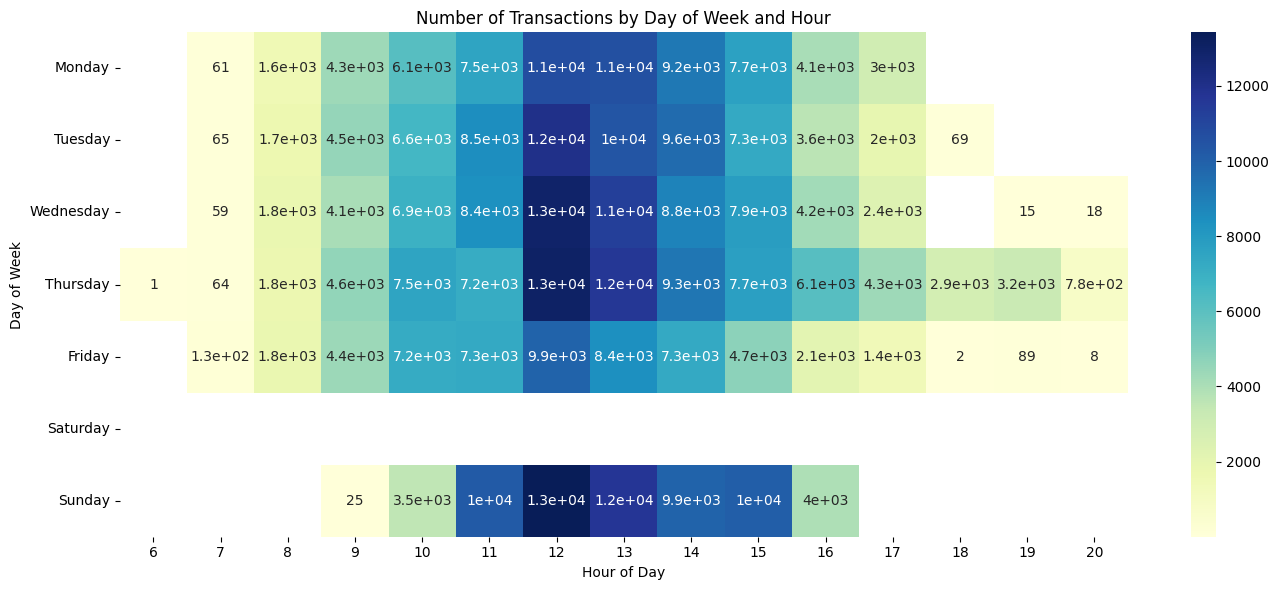

In [ ]:
# Plot heatmap
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
plt.title('Number of Transactions by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

*Wait, no transaction on Saturday? lets check*

In [ ]:
time_heatmap['DayOfWeek'] = time_heatmap['InvoiceDate'].dt.day_name()
print(time_heatmap['DayOfWeek'].value_counts())

DayOfWeek
Thursday     80035
Wednesday    68885
Tuesday      66473
Monday       64893
Sunday       62773
Friday       54825
Name: count, dtype: int64


*There is no "Saturday" inside the data*

In [ ]:
time_heatmap['Weekday'] = time_heatmap['InvoiceDate'].dt.weekday
print(sorted(time_heatmap['Weekday'].unique()))

[np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(6)]


*There is a missing data in Saturday (5)*

Berdasarkan heatmap:<br>  
1. **Transaksi banyak terjadi di sekitar pukul 12 hingga 13 siang**<br>
2. **Transaksi sedikit atau tidak terjadi di bawah jam 8 pagi, kecuali hari jumat, dan di atas jam 18 malam, kecuali hari Kamis** <br>
3. **Terdapat missing values untuk hari Sabtu**<br>
4. **Hari Kamis merupakan hari di mana customer aktif lebih larut, jumlah transaksi di jam 18 hingga 20 masih termasuk banyak**
5. **Hari Jumat merupakan hari di mana customer aktif lebih awal, jumlah transaksi di jam 7 pagi termasuk banyak**

## 2. Karakteristik dari Setiap Cluster

In [ ]:
cust_cluster = df_result_kmeans.reset_index()
cust_cluster.head()

,CustomerID,Recency,Frequency,Monetary,Country_UK,cluster,Recency_Quality
0,12346.0,325,1,77183.60,True,4,Bad_R
1,12347.0,1,182,4310.00,False,2,High_R
2,12348.0,74,31,1797.24,False,2,Low_R
3,12349.0,18,73,1757.55,False,2,Medium_R
4,12350.0,309,17,334.40,False,2,Bad_R


In [ ]:
# Encode Recency_Quality (1 (High), 2 (Medium), 3 (Low), 4 (Bad))
#cust_cluster['Recency_Quality'] = cust_cluster['Recency_Quality'].map({'High_R': 1, 'Medium_R': 2, 'Low_R': 3, 'Bad_R': 4})

In [ ]:
# Cluster summary
cluster_summary = cust_cluster.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Country_UK': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Num_Customers'})
cluster_summary

,Recency,Frequency,Monetary,Country_UK,Num_Customers
cluster,,,,,
0,19.922528,136.160550,2512.236473,1.000000,1962
1,96.545302,37.247483,741.541151,1.000000,1192
2,95.405797,81.396135,2262.538913,0.000000,414
3,1.000000,5807.000000,70925.287500,0.750000,4
4,37.000000,942.181818,137640.483636,0.727273,11
5,268.882119,25.229139,482.179220,1.000000,755


In [ ]:
cust_cluster.groupby('cluster')['Recency_Quality'].value_counts()

cluster  Recency_Quality
0        High_R             957
         Medium_R           891
         Low_R              113
         Bad_R                1
1        Low_R              868
         Bad_R              228
         Medium_R            96
2        Low_R              111
         Bad_R              103
         Medium_R           103
         High_R              97
3        High_R               4
4        High_R               8
         Medium_R             2
         Bad_R                1
5        Bad_R              755
Name: count, dtype: int64

Kesimpulan: <br>
**Cluster 1:** <br>
- Terdiri dari customer berasal dari UK <br>
- Memiliki jumlah customer terbanyak <br>
- Memiliki rata-rata recency rendah (high recency) <br>
- Customer loyal dengan kontribusi pemasukan/spending besar (high recency dan high number customer (average monetary 2512))
- Tipe customer: loyal dan aktif

**Strategi/promo**: Program loyalitas/poin/diskon khusus user loyal

**Cluster 2:**<br>
- Terdiri dari customer berasal dari UK<br>
- Medium recency (96 hari)<br>
- Low spending <br>
- Tipe customer = berisiko

**Strategi/promo**: Program re-engagement (diskon khusus pelanggan yang lama tidak bertransaksi)

**Cluster 3:**<br>
- Terdiri dari customer luar UK <br>
- Mixed recency (mayoritas medium)<br>
- Pemasukan moderate (2262)
- Tipe customer = internasional

**Strategi/promo**: Gratis pengiriman jika spending di atas nominal tertentu

**Cluster 4:**<br>
- Lokasi customer campuran <br>
- Rata-rata recency sangat rendah (high recency) <br>
- Jumlah customer paling sedikit (langka), tetapi jumlah spending besar dan frekuensi paling besar <br>
- Tipe customer = VIP

**Strategi/promo**: Personalisasi layanan khusus/program prioritas/program loyalitas

**Cluster 5:**<br>
- Lokasi customer campuran <br>
- Recency rendah (High recency) <br>
- Jumlah customer sedikit, tetapi spending paling besar <br>
- Tipe customer = potensial VIP

**Strategi/promo**: Personalisasi layanan khusus/program prioritas/program loyalitas

**Cluster 6:**<br>
- Terdiri dari customer UK <br>
- Recency sangat besar (bad recency) = customer tidak aktif <br>
- Low spending
- Tipe customer = kemungkinan besar churned

**Strategi/promo**: Diskon besar untuk pelanggan yang sudah sangat lama tidak aktif

## 3. Segmentasi Customer Luar UK

In [ ]:
# Copy df that only contain Country_isUK = Non UK
df_non_uk = df[df['Country_isUK'] == "Non UK"].copy()
df_non_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_isUK,TotalAmount
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,Non UK,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,Non UK,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,Non UK,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,Non UK,10.2
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,Non UK,15.6


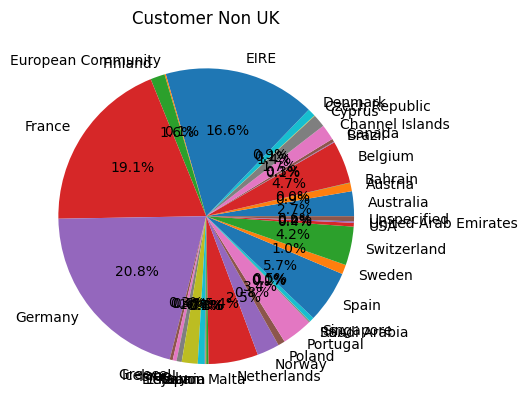

In [ ]:
# Plot pie chart for non UK
customer_non_uk = df_non_uk.groupby(['Country']).size()
plt.title('Customer Non UK')
plt.pie(customer_non_uk, labels=customer_non_uk.index, autopct='%1.1f%%')
plt.show()

In [ ]:
# Country to Region mapping
non_uk_country_to_region = {
    # Western Europe
    'France': 'Western Europe', 'Germany': 'Western Europe', 'Netherlands': 'Western Europe', 'Belgium': 'Western Europe',
    'Austria': 'Western Europe', 'Switzerland': 'Western Europe',

    # Northern Europe
    'Norway': 'Northern Europe', 'Sweden': 'Northern Europe', 'Denmark': 'Northern Europe', 'Finland': 'Northern Europe',
    'Ireland': 'Northern Europe', 'EIRE': 'Northern Europe',

    # Southern Europe
    'Spain': 'Southern Europe', 'Portugal': 'Southern Europe', 'Italy': 'Southern Europe', 'Greece': 'Southern Europe',
    'Cyprus': 'Southern Europe', 'Malta': 'Southern Europe',

    # Eastern Europe
    'Poland': 'Eastern Europe', 'Czech Republic': 'Eastern Europe', 'Hungary': 'Eastern Europe',

    # Others (non-European)
    'USA': 'Outside Europe', 'United Arab Emirates': 'Outside Europe', 'Australia': 'Outside Europe',
    'Singapore': 'Outside Europe', 'Japan': 'Outside Europe', 'Canada': 'Outside Europe',

    # Other or unknown
    'European Community': 'Other', 'Channel Islands': 'Other', 'Unspecified': 'Other'
}

# Map countries to regions
df_non_uk['Region'] = df_non_uk['Country'].map(non_uk_country_to_region).fillna('Other')

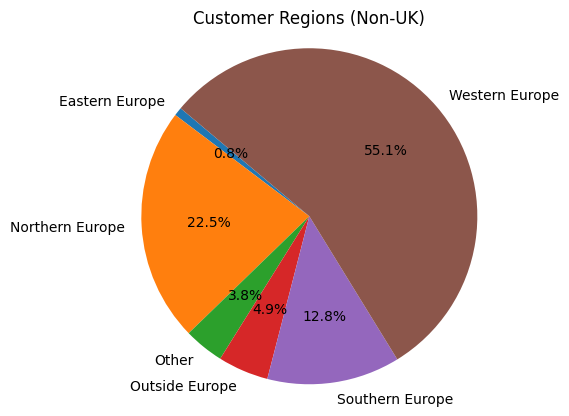

In [ ]:
# Group and plot pie chart
non_uk_region_counts = df_non_uk.groupby('Region').size()
plt.title('Customer Regions (Non-UK)')
plt.pie(non_uk_region_counts, labels=non_uk_region_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

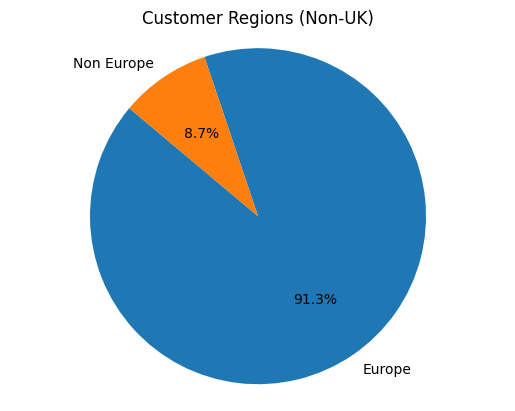

In [ ]:
# Broader Region mapping
regions = {
    # Europe
    'Western Europe': 'Europe', 'Northern Europe': 'Europe', 'Southern Europe': 'Europe', 'Eastern Europe': 'Europe',

    # Others (non-European)
    'Outside Europe': 'Non Europe', 'Other': 'Non Europe'
}

# Map countries to regions
df_non_uk['EU Region'] = df_non_uk['Region'].map(regions).fillna('Other')

# Group and plot pie chart
broader_non_uk_region_counts = df_non_uk.groupby('EU Region').size()
plt.title('Customer Regions (Non-UK)')
plt.pie(broader_non_uk_region_counts, labels=broader_non_uk_region_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
country_non_uk = df_non_uk.groupby(['CustomerID','EU Region']).size().reset_index().drop(0,axis=1)
country_non_uk.head()

# Merge data
df_non_uk_new = country_non_uk.merge(
    recency, on='CustomerID').merge(
    frequency, on='CustomerID').merge(
    monetary, on='CustomerID')

df_non_uk_new = df_non_uk_new.set_index('CustomerID')
df_non_uk_new.head()

,EU Region,Recency,Frequency,Monetary
CustomerID,,,,
12347.0,Non Europe,1,182,4310.00
12348.0,Europe,74,31,1797.24
12349.0,Europe,18,73,1757.55
12350.0,Europe,309,17,334.40
12352.0,Europe,35,85,2506.04


### Encoding

In [ ]:
df_non_uk_new = pd.get_dummies(
    df_non_uk_new,
    columns=['EU Region'],
    drop_first=True
)

df_non_uk_new = df_non_uk_new.rename(
    columns={'EU Region_Non Europe': 'Non Europe'}
)

df_non_uk_new.head()

,Recency,Frequency,Monetary,Non Europe
CustomerID,,,,
12347.0,1,182,4310.00,True
12348.0,74,31,1797.24,False
12349.0,18,73,1757.55,False
12350.0,309,17,334.40,False
12352.0,35,85,2506.04,False


In [ ]:
# Scale the data
scaler = StandardScaler()
df_non_uk_scaled = scaler.fit_transform(df_non_uk_new)

df_non_uk_scaled = pd.DataFrame(
    df_non_uk_scaled,
    columns=df_non_uk_new.columns,
    index=df_non_uk_new.index
)

df_non_uk_scaled.head()

,Recency,Frequency,Monetary,Non Europe
CustomerID,,,,
12347.0,-0.897063,0.248331,0.027097,2.631450
12348.0,-0.196165,-0.234727,-0.115964,-0.380019
12349.0,-0.733840,-0.100367,-0.118224,-0.380019
12350.0,2.060151,-0.279514,-0.199249,-0.380019
12352.0,-0.570617,-0.061978,-0.075610,-0.380019


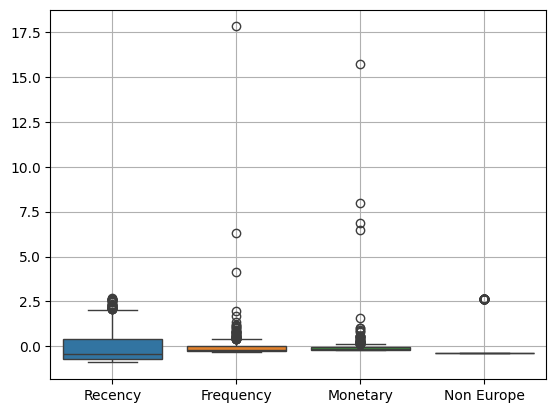

In [ ]:
# Plot scaled data
sns.boxplot(data=df_non_uk_scaled)
plt.grid()
plt.show()

### Modeling

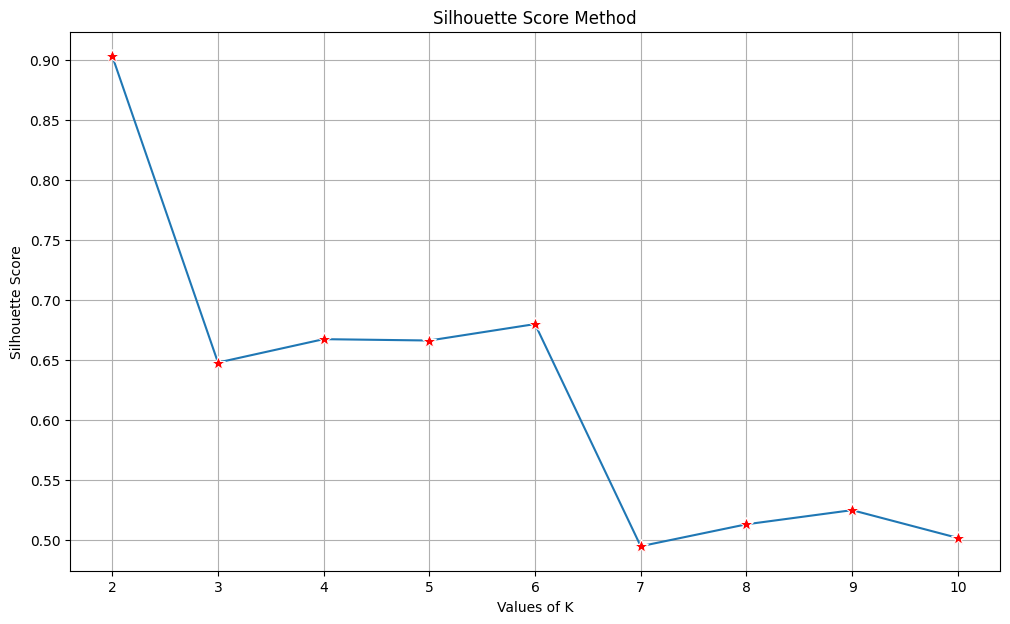

In [ ]:
# Modeling
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_non_uk_scaled)
    silhouette.append(silhouette_score(X=df_non_uk_scaled, labels=kmeans.labels_))

# Plot the score
plt.figure(figsize=(12, 7))
sns.lineplot(
    x=possible_k,
    y=silhouette,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show();

Let's try with 3 clusters

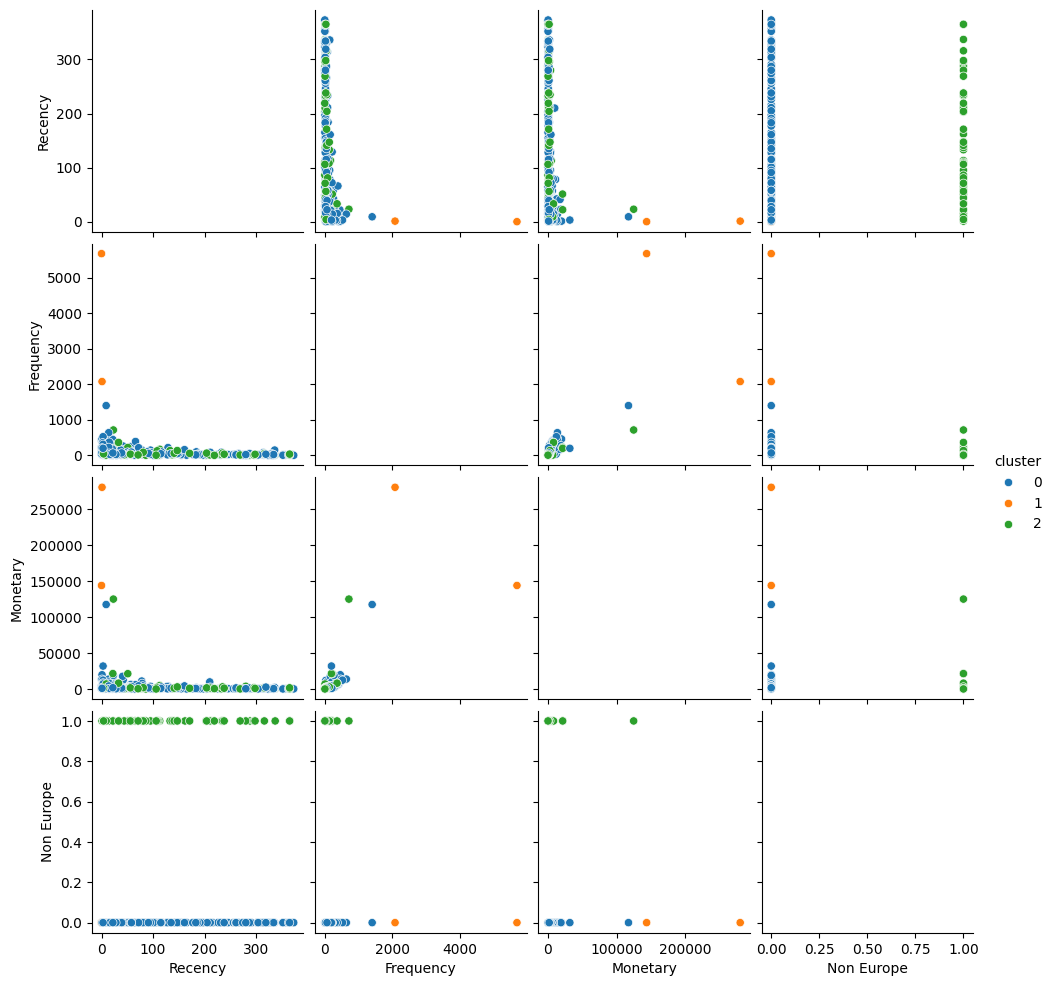

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_non_uk_scaled)

df_non_uk_result_kmeans = df_non_uk_new.copy()
df_non_uk_result_kmeans['cluster'] = kmeans.labels_

sns.pairplot(
    data=df_non_uk_result_kmeans,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)

plt.show();

In [ ]:
# Simple descriptive statistic
(
    df_non_uk_result_kmeans
    .drop("Non Europe", axis=1)
    .groupby('cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])
    .transpose()
)

cluster                       0              1              2
Recency   mean        88.624658       0.500000     137.962264
          std        103.017063       0.707107     104.022550
          min          0.000000       0.000000       1.000000
          q25         16.000000       0.250000      57.000000
          median      42.000000       0.500000     109.000000
          q75        116.000000       0.750000     213.000000
          max        373.000000       1.000000     365.000000
Frequency mean        88.257534    3875.500000      73.056604
          std        120.472944    2544.877305     115.257640
          min          2.000000    2076.000000       1.000000
          q25         22.000000    2975.750000      12.000000
          median      47.000000    3875.500000      35.000000
          q75        105.000000    4775.250000      64.000000
          max       1400.000000    5675.000000     714.000000
Monetary  mean      2565.412329  212015.540000    4715.109057
          std       6900.623837   96435.901641   17337.531171
          min         63.000000  143825.060000      51.560000
          q25        460.400000  177920.300000     494.080000
          median    1013.260000  212015.540000    1300.250000
          q75       2712.910000  246110.780000    2209.850000
          max     117379.630000  280206.020000  124914.530000

In [ ]:
df_non_uk_result_kmeans["Recency_Quality"] = df_non_uk_result_kmeans['Recency'].apply(rqs)
df_non_uk_result_kmeans.head()

,Recency,Frequency,Monetary,Non Europe,cluster,Recency_Quality
CustomerID,,,,,,
12347.0,1,182,4310.00,True,2,High_R
12348.0,74,31,1797.24,False,0,Low_R
12349.0,18,73,1757.55,False,0,Medium_R
12350.0,309,17,334.40,False,0,Bad_R
12352.0,35,85,2506.04,False,0,Medium_R


In [ ]:
non_uk_cluster = df_non_uk_result_kmeans.reset_index()
non_uk_cluster_summary = non_uk_cluster.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Non Europe': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Num_Customers'})
non_uk_cluster_summary

,Recency,Frequency,Monetary,Non Europe,Num_Customers
cluster,,,,,
0,88.624658,88.257534,2565.412329,0.0,365
1,0.500000,3875.500000,212015.540000,0.0,2
2,137.962264,73.056604,4715.109057,1.0,53


In [ ]:
non_uk_cluster.groupby('cluster')['Recency_Quality'].value_counts()

cluster  Recency_Quality
0        Medium_R           100
         High_R              92
         Low_R               92
         Bad_R               81
1        High_R               2
2        Bad_R               22
         Low_R               20
         High_R               6
         Medium_R             5
Name: count, dtype: int64

Kesimpulan: <br>
**Cluster 1:** <br>
- Terdiri dari customer berasal dari Eropa <br>
- Memiliki jumlah customer terbanyak <br>
- Memiliki rata-rata recency moderat (medium recency) <br>
- Frekuensi dan spending moderat
- Tipe customer: cukup loyal, tetapi bervariasi recency-nya

**Cluster 2:**<br>
- Terdiri dari customer berasal dari Eropa
- Jumlah customer terendah
- Recency rendah, frekuensi tinggi
- Spending sangat tinggi
- Tipe customer: VIP (mungkin pelaku bisnis, misal wholesale)

**Cluster 3:**<br>
- Terdiri dari customer berasal dari luar Eropa
- Recency tinggi, frekuensi rendah (rata-rata Bad dan Low recency)
- Spending moderat
- Tipe customer: internasional, tetapi tidak aktif

**Insights:**
1.   Customer luar UK terdiri dari banyak negara, dengan mayoritasnya adalah negara di benua Eropa (91.3%)
2.   Cluster 1 (loyal) memiliki jumlah customer terbanyak (365) dan berasal dari Eropa, dengan recency, frekuensi, dan spending yang moderat
3. Cluster 2 (VIP) memiliki jumlah customer terendah (2) dari Eropa, dengan spending dan frekuensi yang sangat tinggi, serta recency rendah
4. Cluster 3 (Inactive) berasal dari non-eropa dengan spending yang moderat, tetapi recency tinggi (bad dan low recency)

